In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [50]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [51]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()
X_train_full.shape

(60000, 28, 28)

In [52]:
X_train_full.dtype

dtype('uint8')

In [53]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [54]:
class_name=["T-shirt/Top","Trouser","Pullover","Dress","Coat","snadal","Shirt","Sneaker","Bag","ANkle boot"]

In [55]:
class_name[y_train[1]]

'T-shirt/Top'

In [56]:
#Creating the Neural Network

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [58]:
classifier=Sequential()

In [59]:
#flatten Layer
classifier.add(Flatten(input_shape=[28,28]))

In [60]:
#input layer
classifier.add(Dense(3000,activation="relu"))

In [61]:
#hidden layer 1
classifier.add(Dense(100,activation="relu"))

In [62]:
#ouput layer
classifier.add(Dense(10,activation="softmax"))

In [63]:
#Here we are finding the model summery
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 3000)              2355000   
                                                                 
 dense_7 (Dense)             (None, 100)               300100    
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 2,656,110
Trainable params: 2,656,110
Non-trainable params: 0
_________________________________________________________________


In [64]:
# we can also find  layer what we used
classifier.layers

In [65]:
classifier.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=0,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [66]:
#now its time to fit the data
model_history=classifier.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 27s 15ms/step - loss: 0.6578 - accuracy: 0.7867 - val_loss: 0.4982 - val_accuracy: 0.8224
Epoch 2/30
1719/1719 [==============================] - 26s 15ms/step - loss: 0.4615 - accuracy: 0.8387 - val_loss: 0.4345 - val_accuracy: 0.8550
Epoch 3/30
1719/1719 [==============================] - 26s 15ms/step - loss: 0.4197 - accuracy: 0.8533 - val_loss: 0.3943 - val_accuracy: 0.8690
Epoch 4/30
1719/1719 [==============================] - 26s 15ms/step - loss: 0.3951 - accuracy: 0.8625 - val_loss: 0.3794 - val_accuracy: 0.8722
Epoch 5/30
1719/1719 [==============================] - 26s 15ms/step - loss: 0.3741 - accuracy: 0.8675 - val_loss: 0.3853 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 26s 15ms/step - loss: 0.3590 - accuracy: 0.8734 - val_loss: 0.3623 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 27s 16ms/step - loss: 0.3443 - accuracy: 0.8779 - val_loss: 0.3559 -

AttributeError: module 'matplotlib.pyplot' has no attribute 'gce'

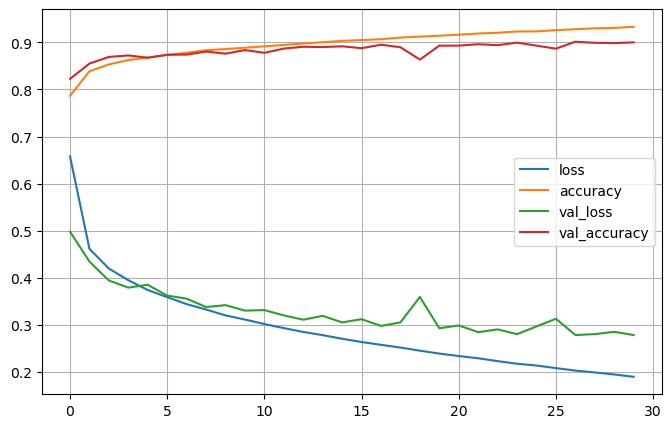

In [69]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gce().set_ylim(0,1)
plt.show()

In [70]:
classifier.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 59.6689 - accuracy: 0.8606


[59.6689453125, 0.8605999946594238]

In [82]:
#lest predict the output
X_new=X_test[0:3]
y_prob=classifier.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 36ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)